In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

In [102]:
dfs = []

for f in os.listdir('./datasets/ml-industry/task2'):
    if f.endswith('.csv') and 'processed' not in f:
        dfs.append(pd.read_csv(f'./datasets/ml-industry/task2/{f}', index_col=0))

In [ ]:
for f in os.listdir('')

In [103]:
# concat all csv(s)
df_all = pd.concat(dfs, ignore_index=True)
# adjust the path
df_all['img_local_path'] = df_all['img_local_path'].apply(lambda x: x.replace('/content/drive/MyDrive/ITMO Master', '.'))
df_all.head(2)

title                                        simple_desc  \
0                Andor  Prequel series to Star Wars' 'Rogue One'. In a...   
1  House of the Dragon  An internal succession war within House Targar...   

    genre    year     votes    time                    labels  rating  \
0  Action  2022–    58203.0  40 min  Action, Adventure, Drama     8.3   
1  Action  2022–   259192.0     NaN  Action, Adventure, Drama     8.5   

  certificate  metascore                                            img_url  \
0       TV-14        NaN  https://m.media-amazon.com/images/M/MV5BNDgxNT...   
1       TV-MA        NaN  https://m.media-amazon.com/images/M/MV5BZjBiOG...   

                                      img_local_path  
0  ./datasets/ml-industry/task2/images/Action/And...  
1  ./datasets/ml-industry/task2/images/Action/Hou...

In [104]:
df_all['genre'] = df_all['genre'].apply(lambda x: 'Biography' if x == 'Biography2' else x)
df_all['img_local_path'] = df_all['img_local_path'].apply(lambda x: x.replace('Biography2', 'Biography'))
df_all[df_all['genre'] == 'Biography'].head()

title  \
2165                                   The Crown   
2166  Dahmer - Monster: The Jeffrey Dahmer Story   
2167                      A Friend of the Family   
2168                                  Black Bird   
2169                                The Playlist   

                                            simple_desc      genre    year  \
2165  Follows the political rivalries and romance of...  Biography  2016–    
2166  Story of the Milwaukee Monster told from the p...  Biography    2022   
2167  Tells the harrowing true story of the Broberg ...  Biography    2022   
2168  Jimmy Keene is sentenced to 10 years in a mini...  Biography    2022   
2169  How Swedish tech entrepreneur Daniel Ek and bu...  Biography    2022   

         votes     time                     labels  rating certificate  \
2165  212513.0   58 min  Biography, Drama, History     8.7       TV-MA   
2166  111738.0  534 min    Biography, Crime, Drama     8.0       TV-MA   
2167    2596.0  473 min    Biography, Crime, Drama     7.4       TV-MA   
2168   57107.0  347 min    Biography, Crime, Drama     8.2       TV-MA   
2169    6598.0  300 min    Biography, Drama, Music     7.5       TV-MA   

      metascore                                            img_url  \
2165        NaN  https://m.media-amazon.com/images/M/MV5BZTEyNj...   
2166        NaN  https://m.media-amazon.com/images/M/MV5BM2IwNW...   
2167        NaN  https://m.media-amazon.com/images/M/MV5BZDkyND...   
2168        NaN  https://m.media-amazon.com/images/M/MV5BZjI3Nj...   
2169        NaN  https://m.media-amazon.com/images/M/MV5BNjkyYT...   

                                         img_local_path  
2165  ./datasets/ml-industry/task2/images/Biography/...  
2166  ./datasets/ml-industry/task2/images/Biography/...  
2167  ./datasets/ml-industry/task2/images/Biography/...  
2168  ./datasets/ml-industry/task2/images/Biography/...  
2169  ./datasets/ml-industry/task2/images/Biography/...

In [106]:
df_all = df_all.drop_duplicates(['title', 'simple_desc'], ignore_index=True)
df_all[df_all['title'] == '1923']

title                                        simple_desc      genre  \
4086  1923  The Duttons face a new set of challenges in th...      Drama   
5166  1923  The Duttons face a new set of challenges in th...  Film Noir   

        year  votes time          labels  rating certificate  metascore  \
4086  2022–     NaN  NaN  Drama, Western     NaN         NaN        NaN   
5166  2022–     NaN  NaN  Drama, Western     NaN         NaN        NaN   

                                                img_url  \
4086  https://m.media-amazon.com/images/M/MV5BYTE2NT...   
5166  https://m.media-amazon.com/images/M/MV5BYTE2NT...   

                                         img_local_path  
4086  ./datasets/ml-industry/task2/images/Drama/1923...  
5166  ./datasets/ml-industry/task2/images/Film Noir/...

In [107]:
df_all.drop(index=5166, inplace=True)
len(df_all)

11289

In [108]:
count = df_all.groupby(['genre'], as_index=False).title.count()
fig = px.bar(count, x='genre', y='title', title='Data distribution over all genre')
fig.show()

In [109]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11289 entries, 0 to 11289
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           11289 non-null  object 
 1   simple_desc     11289 non-null  object 
 2   genre           11289 non-null  object 
 3   year            11187 non-null  object 
 4   votes           10862 non-null  float64
 5   time            9235 non-null   object 
 6   labels          11289 non-null  object 
 7   rating          10862 non-null  float64
 8   certificate     6633 non-null   object 
 9   metascore       11 non-null     float64
 10  img_url         11289 non-null  object 
 11  img_local_path  11289 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.1+ MB


A lot of columns were contains missing values. But fortunately, all mandatory columns `title`, `simple_desc`, `img_local_path`, and `genre` are doesn't have missing value.

In [110]:
df_analysis = df_all.copy(deep=True)

df_analysis['title_char_len'] = df_analysis['title'].str.len()
df_analysis['simple_desc_char_len'] = df_analysis['simple_desc'].str.len()
df_analysis['title_word_len'] = df_analysis['title'].apply(lambda x: len(x.split()))
df_analysis['simple_desc_word_len'] = df_analysis['simple_desc'].apply(lambda x: len(x.split()))
df_analysis.head(2)

title                                        simple_desc  \
0                Andor  Prequel series to Star Wars' 'Rogue One'. In a...   
1  House of the Dragon  An internal succession war within House Targar...   

    genre    year     votes    time                    labels  rating  \
0  Action  2022–    58203.0  40 min  Action, Adventure, Drama     8.3   
1  Action  2022–   259192.0     NaN  Action, Adventure, Drama     8.5   

  certificate  metascore                                            img_url  \
0       TV-14        NaN  https://m.media-amazon.com/images/M/MV5BNDgxNT...   
1       TV-MA        NaN  https://m.media-amazon.com/images/M/MV5BZjBiOG...   

                                      img_local_path  title_char_len  \
0  ./datasets/ml-industry/task2/images/Action/And...               5   
1  ./datasets/ml-industry/task2/images/Action/Hou...              19   

   simple_desc_char_len  title_word_len  simple_desc_word_len  
0                   175               1                    32  
1                   127               4                    21

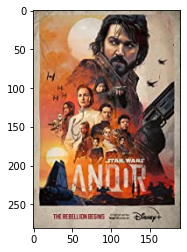

In [111]:
from PIL import Image
import numpy as np
plt.imshow(np.array(Image.open(df_all.head().img_local_path[0])))

In [112]:
fig = px.histogram(
    df_analysis.groupby(['genre'], as_index=False).title_char_len.mean(), 
    x='genre', 
    y='title_char_len', 
    title='Title char length distribution'
)
fig.show()

In [113]:
fig = px.histogram(
    df_analysis.groupby(['genre'], as_index=False).simple_desc_char_len.mean(), 
    x='genre', 
    y='simple_desc_char_len', 
    title='Description char length distribution'
)
fig.show()

In [114]:
fig = px.histogram(
    df_analysis.groupby(['genre'], as_index=False).title_word_len.mean(), 
    x='genre', 
    y='title_word_len', 
    title='Title word length distribution'
)
fig.show()

In [115]:
fig = px.histogram(
    df_analysis.groupby(['genre'], as_index=False).simple_desc_word_len.mean(), 
    x='genre', 
    y='simple_desc_word_len', 
    title='Description word length distribution'
)
fig.show()

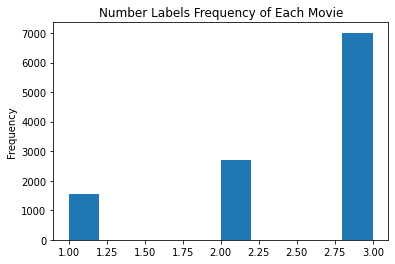

In [116]:
df_analysis['labels_count'] = df_analysis.labels.apply(lambda x: len(x.split(', ')))
df_analysis['labels_count'].plot.hist()
plt.title('Number Labels Frequency of Each Movie')
plt.show()

In [117]:
onehot_labels = pd.get_dummies(df_all.genre)
df_all.loc[:, onehot_labels.columns] = onehot_labels
df_all.head()

title  \
0                                      Andor   
1                        House of the Dragon   
2                            Game of Thrones   
3  The Lord of the Rings: The Rings of Power   
4                                     Titans   

                                         simple_desc   genre        year  \
0  Prequel series to Star Wars' 'Rogue One'. In a...  Action      2022–    
1  An internal succession war within House Targar...  Action      2022–    
2  Nine noble families fight for control over the...  Action   2011–2019   
3  Epic drama set thousands of years before the e...  Action      2022–    
4  A team of young superheroes combat evil and ot...  Action  I) (2018–    

       votes    time                    labels  rating certificate  metascore  \
0    58203.0  40 min  Action, Adventure, Drama     8.3       TV-14        NaN   
1   259192.0     NaN  Action, Adventure, Drama     8.5       TV-MA        NaN   
2  2084098.0  57 min  Action, Adventure, Drama     9.2       TV-MA        NaN   
3   288014.0     NaN  Action, Adventure, Drama     6.9       TV-14        NaN   
4   100382.0  45 min  Action, Adventure, Crime     7.6       TV-MA        NaN   

   ... Horror Music  Musical  Mystery  Romance  Sci-Fi  Sport  Thriller  War  \
0  ...      0     0        0        0        0       0      0         0    0   
1  ...      0     0        0        0        0       0      0         0    0   
2  ...      0     0        0        0        0       0      0         0    0   
3  ...      0     0        0        0        0       0      0         0    0   
4  ...      0     0        0        0        0       0      0         0    0   

   Western  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 34 columns]

In [118]:
# distribute labels
for c in onehot_labels.columns:
    df_all[c] = df_all['labels'].apply(lambda labels: 1 if c in labels else 0)

In [119]:
df_all.columns

Index(['title', 'simple_desc', 'genre', 'year', 'votes', 'time', 'labels',
       'rating', 'certificate', 'metascore', 'img_url', 'img_local_path',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film Noir', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [96]:
# df_all = df_all[['title', 'simple_desc', 'genre', 'img_local_path']]
df_all = df_all.drop(['year', 'votes', 'time', 'rating', 'labels', 'certificate', 'metascore', 'img_url'], axis=1)
df_all.to_csv('./datasets/ml-industry/task2/processed-multilabel-no-duplicate.csv', header=True, index=False)